In [20]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

### DATA ANALYSIS AND FEATURE ENGINEERING

The original 'books.csv' file has been corrected because there were some errors that prevented it from being loaded.


In [21]:
# Download the Books list
# df_Books = pd.read_csv(r"C:\Users\gunon\Documents\bootcamp-main\Book_Rating\books.csv", sep=",", index_col='bookID')
df_Books = pd.read_csv(r"C:\Users\gunon\Documents\bootcamp-main\3-projects\ML_Book_Valuations\books.csv", sep=",")

In [22]:
df_Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


### Step 1 : Adding book's genre in the data frame Books


In [23]:
# Step 1 and 2 are too long. We start by loading the df_Genre from csv file
df_Genre_Bright = pd.read_csv(r"C:\Users\gunon\Documents\bootcamp-main\Book_Rating\Genre.csv", sep=",")

# Create a mapping dictionary containing only BookID and BookGenre
book_genre_map = dict(zip(df_Genre_Bright['bookID'], df_Genre_Bright['book_genre']))

# Convert the bookID column in dataframe Genre from object to int64
df_Genre_Bright['bookID'] = df_Genre_Bright['bookID'].astype('int64')

# Add bookgenre map to the Books dataframe using the map function
df_Books['book_genre'] = df_Books['bookID'].map(book_genre_map)


In [24]:
df_Books

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,book_genre
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"genres.fantasy, paranormal"
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,"genres.fantasy, paranormal"
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,"genres.fantasy, paranormal"
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,genres.fiction
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,"genres.fantasy, paranormal"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,genres.non-fiction
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,genres.fiction
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,genres.fiction
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,genres.non-fiction


In [25]:
# Print rows where the value in column book_genre is NaN
print(df_Books[df_Books['book_genre'].isna()])

       bookID                                              title  \
29         51  Hatchet: A Guide for Using "Hatchet" in the Cl...   
31         54                      Molly Hatchet - 5 of the Best   
55         89  Active Literacy Across the Curriculum: Strateg...   
56         90                    Simply Beautiful Beaded Jewelry   
58         92  Mapping the Big Picture: Integrating Curriculu...   
...       ...                                                ...   
11103   45557   Co. Aytch: A Confederate Memoir of the Civil War   
11104   45564                             Jonny Reb & Billy Yank   
11106   45570                                   Fantastic Mr Fox   
11107   45572                 Fantastic Mr. Fox (Cover to Cover)   
11112   45595                       La Tía Julia y el Escribidor   

                                              authors  average_rating  \
29     Donna Ickes/Edward Sciranko/Keith Vasconcelles            4.00   
31                                   

In [26]:
# Where are the NaN columns
df_Books.isna().sum()

bookID                   0
title                    0
authors                  0
average_rating           0
isbn                     0
isbn13                   0
language_code            0
num_pages                0
ratings_count            0
text_reviews_count       0
publication_date         0
publisher                0
book_genre            1821
dtype: int64

### Step 2 - Convert categorical variable into dummy/indicator variables.

Remark : Only 1824 books have no genre out of a total of 11127 books, which represents 16% of the total.

In [27]:
# Convert column book_genre into indicators
df_Books=pd.concat([df_Books, pd.get_dummies(df_Books.book_genre)],axis=1)
# A look at the df
df_Books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   bookID                                         11127 non-null  int64  
 1   title                                          11127 non-null  object 
 2   authors                                        11127 non-null  object 
 3   average_rating                                 11127 non-null  float64
 4   isbn                                           11127 non-null  object 
 5   isbn13                                         11127 non-null  int64  
 6   language_code                                  11127 non-null  object 
 7   num_pages                                      11127 non-null  int64  
 8   ratings_count                                  11127 non-null  int64  
 9   text_reviews_count                             111

### Step 3 - Calculate the seniority of the books
From the Publication date until today.

In [28]:
from datetime import datetime

# Check if column publication_date is correct 
for index, row in df_Books.iterrows():
    try:
        date_obj = datetime.strptime(row['publication_date'], '%m/%d/%Y')
    except ValueError as e:
        print(f"Error in row {index}: {e}")
        print("Row details:", row)

# There are no incorrect rows

In [29]:
# Check if column publication_date is correct 
for index, row in df_Books.iterrows():
    try:
        date_obj = datetime.strptime(row['publication_date'], '%m/%d/%Y')
    except ValueError as e:
        print(f"Error in row {index}: {e}")
        print("Row details:", row)



In [30]:
# Convert 'publication_date' to datetime with US format
df_Books['publication_date'] = pd.to_datetime(df_Books['publication_date'], format='%m/%d/%Y')

In [31]:
from datetime import datetime

# Calculate the number of months from the Publication date until today
today = datetime.today()
df_Books['Months_Until_Today'] = (today.year - df_Books['publication_date'].dt.year) * 12 + (today.month - df_Books['publication_date'].dt.month)

In [32]:
df_Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   bookID                                         11127 non-null  int64         
 1   title                                          11127 non-null  object        
 2   authors                                        11127 non-null  object        
 3   average_rating                                 11127 non-null  float64       
 4   isbn                                           11127 non-null  object        
 5   isbn13                                         11127 non-null  int64         
 6   language_code                                  11127 non-null  object        
 7   num_pages                                      11127 non-null  int64         
 8   ratings_count                                  11127 non

### Step 4 : Book's language

Grouping English-language books under a single code eng.


In [33]:
# df_Books['language_code'] = df_Books['language_code'].apply(lambda x: 'eng' if x in ['en-CA','en-GB','en-US','enm'])

df_Books['language_code'].replace(['en-CA', 'en-GB', 'en-US', 'enm'],'eng', inplace=True)


### Step 5 : Work on the authors
We will keep only the name of the first author.

In [34]:
# Split the author column to keep only the name of the writer
df_Books[['authors','co-authors']] = df_Books['authors'].str.split(pat='/', n=1, expand=True)
#df_Books[['authors','co-authors']]=df_Books['authors'].str.split('/', 1, expand=True)

# Add a column with the average ratings per authors for all its books.
# 1) calculate the average ratings by authors
#average_ratings = df_Books.groupby('authors')['average_rating'].mean()
# 2) Merge the average ratings back into the original DataFrame df_Books
#df_Books['authors_rating'] = df_Books['authors'].map(average_ratings)


We are going to add the rating of the author coming from the file Authors.csv

In [35]:
# Load the csv file
df_Authors = pd.read_csv(r"C:\Users\gunon\Documents\bootcamp-main\3-projects\ML_Book_Valuations\Authors.csv",sep=",")

# Create a mapping dictionnary containing only the columns name and average_rating
auteur_map = dict(zip(df_Authors['name'], df_Authors['average_rating']))

# Adding Authors rating to df-Books
df_Books['author_rating'] = df_Books['authors'].map(auteur_map)

# For the authors not in the csv file, we give a note of zero.
df_Books['author_rating'] = df_Books['author_rating'].fillna(0)



In [36]:
df_Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   bookID                                         11127 non-null  int64         
 1   title                                          11127 non-null  object        
 2   authors                                        11127 non-null  object        
 3   average_rating                                 11127 non-null  float64       
 4   isbn                                           11127 non-null  object        
 5   isbn13                                         11127 non-null  int64         
 6   language_code                                  11127 non-null  object        
 7   num_pages                                      11127 non-null  int64         
 8   ratings_count                                  11127 non

In [37]:
df_Books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,...,genres.fiction,"genres.history, historical fiction, biography","genres.mystery, thriller, crime",genres.non-fiction,genres.poetry,genres.romance,genres.young-adult,Months_Until_Today,co-authors,author_rating
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,0439785960,9780439785969,eng,652,2095690,27591,...,0,0,0,0,0,0,0,204,Mary GrandPré,4.44
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,0439358078,9780439358071,eng,870,2153167,29221,...,0,0,0,0,0,0,0,228,Mary GrandPré,4.44
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,...,0,0,0,0,0,0,0,238,None,4.44
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9780439655484,eng,435,2339585,36325,...,1,0,0,0,0,0,0,232,Mary GrandPré,4.44
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,0439682584,9780439682589,eng,2690,41428,164,...,0,0,0,0,0,0,0,228,Mary GrandPré,4.44


In [38]:
# Saving Books dataframe with Genre into csv file
df_Books.to_csv(r"C:\Users\gunon\Documents\bootcamp-main\3-projects\ML_Book_Valuations\Books_Final.csv", index=False)


### ANALYSIS


In [39]:
df_Books.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,genres.children,"genres.comics, graphic","genres.fantasy, paranormal",genres.fiction,"genres.history, historical fiction, biography","genres.mystery, thriller, crime",genres.non-fiction,genres.poetry,genres.romance,genres.young-adult,Months_Until_Today,author_rating
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498,0.047183,0.034061,0.076211,0.292262,0.084210,0.073874,0.167431,0.021479,0.026782,0.012852,276.442977,3.873837
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608,0.212039,0.181395,0.265347,0.454823,0.277714,0.261578,0.373377,0.144982,0.161452,0.112639,99.122542,0.582723
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,216.000000,3.820000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,246.000000,3.960000
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,302.000000,4.080000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1484.000000,5.000000


<function matplotlib.pyplot.show(close=None, block=None)>

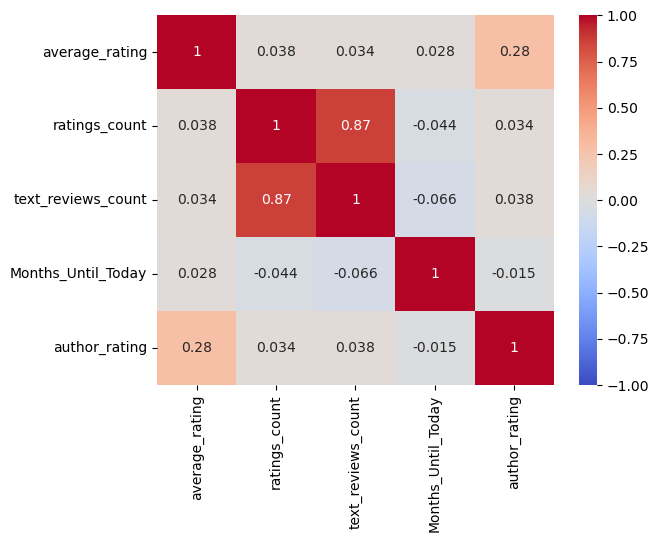

In [41]:
df_corr = df_Books[["average_rating", "ratings_count", "text_reviews_count","Months_Until_Today","author_rating"]]
corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show

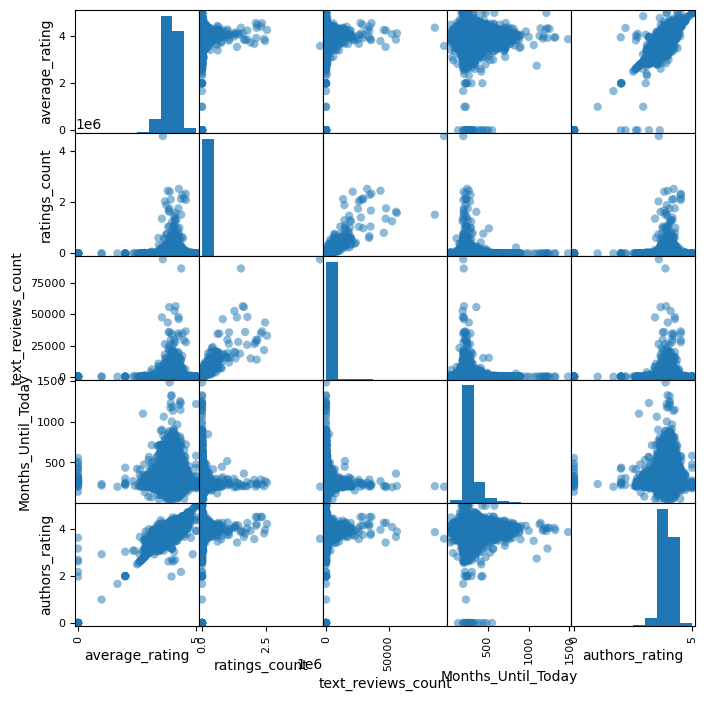

In [27]:
pd.plotting.scatter_matrix(df_corr, figsize=(8,8), marker="o")
plt.show()
     


In [28]:
df_Books.sum()

C:\Users\gunon\AppData\Local\Temp\ipykernel_24352\2045526347.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Books.sum()


bookID                                                                                   237126817
title                                            Harry Potter and the Half-Blood Prince (Harry ...
authors                                          J.K. RowlingJ.K. RowlingJ.K. RowlingJ.K. Rowli...
average_rating                                                                            43769.51
isbn                                             043978596004393580780439554896043965548X043968...
isbn13                                                                          108598272678516792
language_code                                    engengengengengengengengengengengengengengenge...
num_pages                                                                                  3742866
ratings_count                                                                            199578424
text_reviews_count                                                                         6029215
publisher 

In [38]:
Genre_PT=pd.pivot_table(df_Books, values='average_rating', index='book_genre', aggfunc=[np.mean, np.count_nonzero])
Genre_PT

,mean,count_nonzero
,average_rating,average_rating
book_genre,,
genres.children,4.025333,525
"genres.comics, graphic",4.095277,379
"genres.fantasy, paranormal",3.994906,848
genres.fiction,3.875363,3252
"genres.history, historical fiction, biography",4.005091,937
"genres.mystery, thriller, crime",3.912555,822
genres.non-fiction,3.986677,1863
genres.poetry,4.104519,239


In [36]:
df_Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   bookID                                         11127 non-null  int64         
 1   title                                          11127 non-null  object        
 2   authors                                        11127 non-null  object        
 3   average_rating                                 11127 non-null  float64       
 4   isbn                                           11127 non-null  object        
 5   isbn13                                         11127 non-null  int64         
 6   language_code                                  11127 non-null  object        
 7   num_pages                                      11127 non-null  int64         
 8   ratings_count                                  11127 non